# Data prepration

In [1]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi

2022-06-01 16:21:36.708292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 16:21:36.708324: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# n = 100000
# m1, m2 = 0, 1
# x1, y1 = np.random.normal(m1, 1, size=n), np.zeros(n)
# x2, y2 = np.random.normal(m2, 1, size=n), np.ones(n)
# x, y = np.transpose(np.array([np.append(x1, x2)])), np.transpose(np.array([np.append(y1, y2)]))
# x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)
# x.shape, y.shape

In [2]:
# Generate n data with mean1 and n data with mean2
def mean_data(n, mean1, mean2, rand=1234):
    m1 = np.zeros(n)
    m2 = mean2 * np.ones(n)
    if mean1 != 0:
        m1 = mean1 * np.ones(n)
        
    x1, y1 = np.transpose(np.array([np.random.normal(m1, 1, size=n), m2])), np.zeros(n)
    x2, y2 = np.transpose(np.array([np.random.normal(m2, 1, size=n), m2])), np.ones(n)
    x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = rand)
    
    return x_train, x_test, y_train, y_test

In [3]:
n = 100000
mean_min = -2
mean_max = 2

m1 = np.zeros(n)
m2 = np.random.uniform(mean_min, mean_max, n)
x1, y1 = np.transpose(np.array([np.random.normal(m1, 1, size=n), m2])), np.zeros(n)
x2, y2 = np.transpose(np.array([np.random.normal(m2, 1, size=n), m2])), np.ones(n)
x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

# Training All Means

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]);

2022-06-01 16:21:56.160193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-01 16:21:56.160230: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-01 16:21:56.160256: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-matan): /proc/driver/nvidia/version does not exist
2022-06-01 16:21:56.160690: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# print(x_train[:4,]);
# model(x_train[:4,]);
# model.summary()

In [7]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-06-01 16:21:57.624365: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:21:57.624412: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:21:57.624561: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [8]:
# os.getcwd()

In [9]:
EPOCHS=10
model.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
);

2022-06-01 16:22:00.345383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 26/160 [===>..........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.6514

2022-06-01 16:22:00.845316: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:22:00.845352: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:22:00.852761: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-06-01 16:22:00.853861: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-01 16:22:00.865410: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-162157/train/plugins/profile/2022_06_01_16_22_00

2022-06-01 16:22:00.870269: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220601-162157/train/plugins/profile/2022_06_01_16_22_00/jupyter-matan.trace.json.gz
2022-06-01 16:22:00.873489: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-162

160/160 [==============================] - 1s 5ms/step - loss: 0.5794 - accuracy: 0.6776
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5683 - accuracy: 0.6836
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5659 - accuracy: 0.6837
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5653 - accuracy: 0.6843
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.6837
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5646 - accuracy: 0.6849
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5644 - accuracy: 0.6848
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5646 - accuracy: 0.6843
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5646 - accuracy: 0.6850
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5643 - accuracy: 0.6844


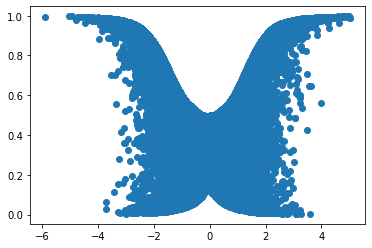

In [11]:
plt.scatter(x_test[:,0], model(x_test))

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

1250/1250 - 1s - loss: 0.5646 - accuracy: 0.6807


[0.5645649433135986, 0.6807249784469604]

In [19]:
# j = 5
# print("Values:", np.transpose(x_test[:j,]))
# print("predictions:", model(x_test[:j,]).numpy()[:, 0])
# print("Truths:", np.transpose(y_test[:j]))

Values: [[-2.22276366 -0.61844818 -1.18074715 -1.0551031  -0.27859599]
 [-0.96372336  1.83692579 -0.13644819 -0.74503451  0.47314118]]
predictions: [0.8458062  0.06594619 0.5288948  0.61169034 0.44559503]
Truths: [1. 0. 1. 1. 0.]


In [19]:
# predictions, y_true = model(x_test).numpy()[:, 0], np.transpose(y_test > 0.5)[0]
# fig, ax = plt.subplots(figsize=(6,6))
# ax.hist(predictions[y_true], histtype='step', lw=2, bins=50)
# ax.hist(predictions[~y_true],histtype='step', lw=2, bins=50)
# ax.set_xlabel("Score")
# fpr, tpr, _ = sklearn.metrics.roc_curve(y_true, predictions)
# fontsize=16
# minor_size=14
# fig, ax1 = plt.subplots(figsize=(6,6))
# auc = sklearn.metrics.auc(fpr, tpr)
# ax1.plot(fpr, tpr, lw=2)
# # ax1.plot([0, 1], [0, 1], '--', lw=2)
# ax1.set_xlabel('False positive rate', fontsize=fontsize)
# ax1.set_ylabel('True positive rate', fontsize=fontsize)
# ax1.set_title('ROC curve, AUC = %.4f' % auc, fontsize=fontsize)
# ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

In [10]:
# Model Classification Predictions
predictions = np.round(model(x_test).numpy())

# Looking at original data and predictions
print(x_test[:10, 0])
print(x_test[:10, 1])
print(predictions[:10, 0])
print(y_test[:10])

[ 0.46142149  0.96899263  0.4607391  -0.47023221 -1.49460444  2.5644438
 -1.67821554 -0.34727276  2.09896872  1.67867623]
[ 0.56218837  1.58003994  0.12288677 -0.37325307 -0.11817573  1.32026793
 -1.4300314  -0.61844564  0.06527904 -1.62902619]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]


In [11]:
# Separate Data into bins
# Find all data points within epsilon of m

# m = 1.5
epsilon = 0.1
bins = int((mean_max - mean_min) / (2 * epsilon))
center_list = np.arange(mean_min + epsilon, mean_max + epsilon, 2 * epsilon)
# print(center_list)

test_binned, x_test_bin, y_test_bin = [], [], []
for i in range(bins):
    c = center_list[i]
    test_binned.append(np.array([(x, m, y) for (x, m, y) in zip(x_test[:, 0], x_test[:, 1], y_test) if np.abs(m - c) < epsilon]))
    x_test_bin.append(np.array(test_binned[i][:, 0:2]))
    y_test_bin.append(np.array(test_binned[i][:, 2]))
#     print(test_binned[i].shape)



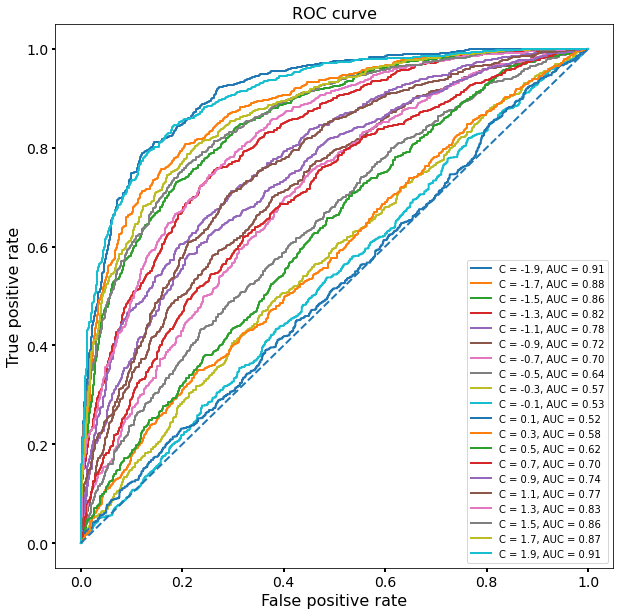

In [12]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14

for i in range(bins):
    x_test = x_test_bin[i]
    y_test = y_test_bin[i]
    predictions = model(x_test).numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (center_list[i], auc))

# fpr, tpr, _ = sklearn.metrics.roc_curve(y_test_bin, predictions)
# auc = sklearn.metrics.auc(fpr, tpr)
# ax1.plot(fpr, tpr, lw=2)
# # ax1.set_title('ROC curve, AUC = %.4f' % auc, fontsize=fontsize)

ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('ROC curve', fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

# Training for just one mean

In [12]:
# # Now Comparing to Naive training for just, say, mean 1.9
x_train, x_test, y_train, y_test = mean_data(100000, 0, 1.9)

In [13]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-06-01 16:22:49.382822: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:22:49.382853: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:22:49.382904: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [14]:
EPOCHS=10
model2.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
)

Epoch 1/10
 29/160 [====>.........................] - ETA: 0s - loss: 0.4698 - accuracy: 0.7929

2022-06-01 16:22:50.743261: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-01 16:22:50.743301: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-01 16:22:50.763942: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-06-01 16:22:50.764927: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-01 16:22:50.775556: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-162249/train/plugins/profile/2022_06_01_16_22_50

2022-06-01 16:22:50.779964: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220601-162249/train/plugins/profile/2022_06_01_16_22_50/jupyter-matan.trace.json.gz
2022-06-01 16:22:50.781671: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220601-162

160/160 [==============================] - 1s 5ms/step - loss: 0.3978 - accuracy: 0.8210
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3806 - accuracy: 0.8273
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3799 - accuracy: 0.8275
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8280
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8278
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8280
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8280
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8282
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8280
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8282


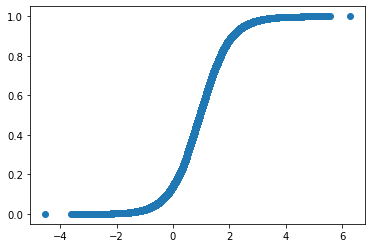

In [15]:
plt.scatter(x_test[:,0], model2(x_test))

In [34]:
model2.evaluate(x_test,  y_test, verbose=2)

1250/1250 - 1s - loss: 0.3816 - accuracy: 0.8278


[0.3815842866897583, 0.8278250098228455]

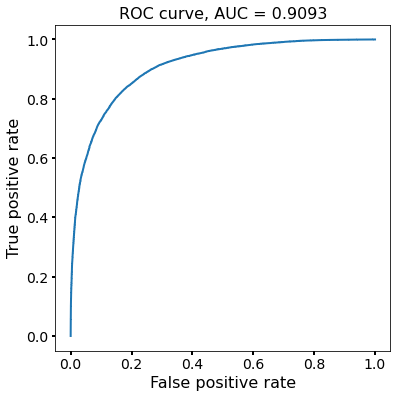

In [35]:
predictions = model2(x_test).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (center_list[i], auc))
# fig, ax = plt.subplots(figsize=(6,6))
# ax.hist(predictions[y_true], histtype='step', lw=2, bins=50)
# ax.hist(predictions[~y_true],histtype='step', lw=2, bins=50)
ax1.set_xlabel("Score")
# fpr, tpr, _ = sklearn.metrics.roc_curve(y_true, predictions)
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
# auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2)
# ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('ROC curve, AUC = %.4f' % auc, fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

# Training for one mean and testing on another

In [38]:
# First we train on the mean 1.5
x_train, x_test, y_train, y_test = mean_data(100000, 0, 1.5)

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

EPOCHS=10
model3.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
)

2022-05-10 13:09:11.526518: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-10 13:09:11.526557: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-10 13:09:11.526603: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/10
 26/160 [===>..........................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7568

2022-05-10 13:09:12.033017: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-10 13:09:12.033053: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-10 13:09:12.065716: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-10 13:09:12.066743: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-10 13:09:12.077298: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220510-130911/train/plugins/profile/2022_05_10_13_09_12

2022-05-10 13:09:12.081877: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220510-130911/train/plugins/profile/2022_05_10_13_09_12/jupyter-matan.trace.json.gz
2022-05-10 13:09:12.084012: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220510-130

160/160 [==============================] - 1s 5ms/step - loss: 0.4828 - accuracy: 0.7706
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.7729
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4736 - accuracy: 0.7728
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7732
Epoch 5/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7732
Epoch 6/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4731 - accuracy: 0.7734
Epoch 7/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7734
Epoch 8/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4728 - accuracy: 0.7731
Epoch 9/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4730 - accuracy: 0.7734
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.7732


In [39]:
# Now we generate data for differentiating mean 0 and mean 0.5 (instead of 1.5)
xp_train, xp_test, yp_train, yp_test = mean_data(100000, 0, 0.5)

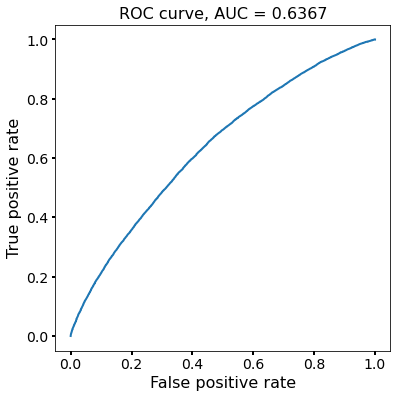

In [41]:
# We want to see how our model trained on differentiating 0 and 1.5 does here
predictions = model3(xp_test).numpy()
fpr, tpr, _ = sklearn.metrics.roc_curve(yp_test, predictions)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel("Score")
fontsize=16
minor_size=14
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(fpr, tpr, lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('ROC curve, AUC = %.4f' % auc, fontsize=fontsize)
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

In [ ]:
# We see that this is about the same as our interpolated model for data centered at 0.5

# Now let's try generalizing our probability distributions

In [2]:
n = 100000
k_min = 1
k_max = 5

m1 = np.ones(n)
m2 = np.random.uniform(k_min, k_max, n)
x1, y1 = np.transpose(np.array([chi.rvs(m1, size=n), m2])), np.zeros(n)
x2, y2 = np.transpose(np.array([chi.rvs(m2, size=n), m2])), np.ones(n)
x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

In [3]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]);

loss_fn = tf.keras.losses.BinaryCrossentropy()
model4.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

batch_size = 1000

checkpoint_path = "tutorial/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1,
    save_freq=10*batch_size
)

log_dir = "tutorial/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-05-25 15:51:11.508993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 15:51:11.509030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 15:51:11.509061: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-matan): /proc/driver/nvidia/version does not exist
2022-05-25 15:51:11.509431: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-25 15:51:11.527091: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initiali

In [4]:
EPOCHS=10
model4.fit(
    x_train, y_train, epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[cp_callback, tensorboard_callback]
);

2022-05-25 15:51:14.112666: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 22/160 [===>..........................] - ETA: 1s - loss: 0.6132 - accuracy: 0.6756

2022-05-25 15:51:14.685185: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-25 15:51:14.685219: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-25 15:51:14.694780: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-25 15:51:14.697111: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-25 15:51:14.710969: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220525-155111/train/plugins/profile/2022_05_25_15_51_14

2022-05-25 15:51:14.716056: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tutorial/logs/20220525-155111/train/plugins/profile/2022_05_25_15_51_14/jupyter-matan.trace.json.gz
2022-05-25 15:51:14.721573: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tutorial/logs/20220525-155

160/160 [==============================] - 1s 6ms/step - loss: 0.5471 - accuracy: 0.7095
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.5258 - accuracy: 0.7174
Epoch 3/10
160/160 [==============================] - 1s 6ms/step - loss: 0.5236 - accuracy: 0.7183
Epoch 4/10
160/160 [==============================] - 1s 6ms/step - loss: 0.5220 - accuracy: 0.7191
Epoch 5/10
160/160 [==============================] - 1s 5ms/step - loss: 0.5218 - accuracy: 0.7190
Epoch 6/10
160/160 [==============================] - 1s 5ms/step - loss: 0.5216 - accuracy: 0.7191
Epoch 7/10
160/160 [==============================] - 1s 6ms/step - loss: 0.5211 - accuracy: 0.7193
Epoch 8/10
160/160 [==============================] - 1s 6ms/step - loss: 0.5214 - accuracy: 0.7188
Epoch 9/10
160/160 [==============================] - 1s 5ms/step - loss: 0.5208 - accuracy: 0.7195
Epoch 10/10
160/160 [==============================] - 1s 5ms/step - loss: 0.5208 - accuracy: 0.7184


In [5]:
# Model Classification Predictions
predictions = np.round(model4(x_test).numpy())

# Looking at original data and predictions
print(x_test[:10, 0])
print(x_test[:10, 1])
print(predictions[:10, 0])
print(y_test[:10])

[0.57044791 0.56492936 2.86451967 1.18940577 0.12813501 1.40194709
 2.37090295 3.14344972 1.6692916  0.86413991]
[1.25124101 4.75598031 3.36210578 1.12142817 3.75137752 3.16761521
 3.06376749 4.66173878 1.74526509 3.98275426]
[0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]
[1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]


In [6]:
# Separate Data into bins

epsilon = 0.1
bins = int((k_max - k_min) / (2 * epsilon))
k_list = np.arange(k_min + epsilon, k_max + epsilon, 2 * epsilon)
# print(center_list)

test_binned, x_test_bin, y_test_bin = [], [], []
for i in range(bins):
    k0 = k_list[i]
    test_binned.append(np.array([(x, k, y) for (x, k, y) in zip(x_test[:, 0], x_test[:, 1], y_test) 
                                 if np.abs(k - k0) < epsilon]))
    x_test_bin.append(np.array(test_binned[i][:, 0:2]))
    y_test_bin.append(np.array(test_binned[i][:, 2]))

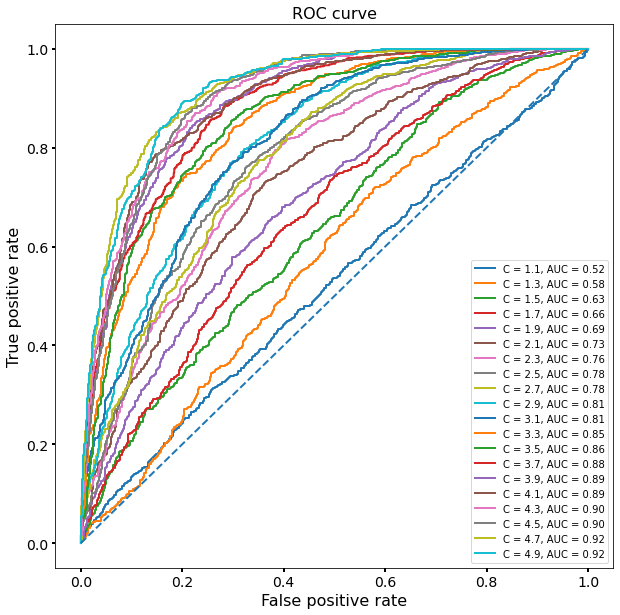

In [38]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14

for i in range(bins):
    x_test = x_test_bin[i]
    y_test = y_test_bin[i]
    predictions = model4(x_test).numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions)
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label='C = %.1f, AUC = %.2f' % (k_list[i], auc))

ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('ROC curve', fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)